<a href="https://colab.research.google.com/github/shilparbhagat/classification_ML_project/blob/main/Cardiovascular_risk_prediction_(Classification)_ML_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Cardiovascular Risk Prediction Project**



##### **Project Type**    -Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Shilpa Pradip Patil






# **Project Summary -**

In this dataset we are having patients information.This dataset contains 17 columns such as age, education, sex, is_smoking, cigsPerDay,BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP,BMI, heartRate, glucose, TenYearCHD and 3390 rows.
In this project , we plot different stacked bars to get informtaion for different categories.
The term cardiovascular refers to the heart (cardio) and the blood vessels (vascular).

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Build a classification model that predicts heart disease

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSet/Copy of data_cardiovascular_risk.csv'

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df=pd.read_csv(path)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df1=df.isnull().sum()

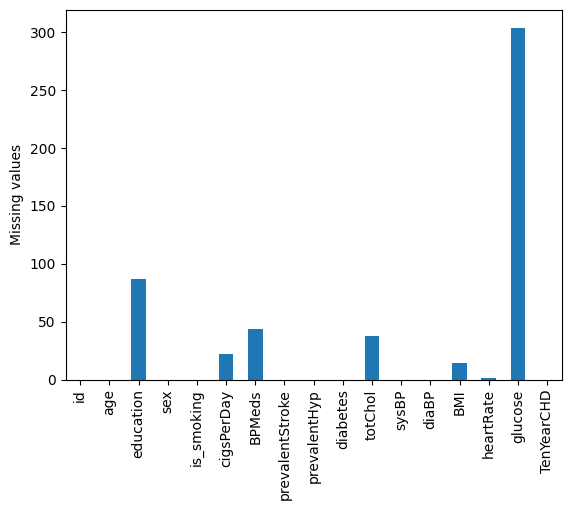

In [8]:
# Visualizing the missing values
df1.plot(kind='bar')
plt.ylabel("Missing values")
plt.show()

### What did you know about your dataset?

From the above data we can understand that there are some columns such as education,CigsPerDay,BPMeds,totChol,BMI,heartRate,glucose contains null values

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

This dataset contains 17 variables such as:

id: This column contains each customers unique identification number

age: This column contains from 32 to 70 years old patient age information

education: This column doesnt gives specific information about education of pateint .this column only contains 1.0,2.0,3.0,4.0 information

sex:This column contains F for female and M for male

is_smoking:This column gives us information in Yes and No, if patient is smoking this column contains 'Yes' else 'No'

cigsPerDay:This column contains records every patient consumes cigerates per day

BPMeds:This column gives information in 1.0 and 0.0. if patient is having BP Medicines this column contains 1.0 else 0.0

prevalentStroke:This column gives information in 1 and 0.

prevalentHyp:This column gives information in 1 and 0.

diabetes:This column gives information in 1 and 0. if patient is having diabetes this column contains 1 else 0

totChol:This column gives total cholesterol for each patient

sysBP::This column gives systolic BP for each patient
.The pressure in the arteries when the heart contracts (systole) is called systolic blood pressure

diaBP:This column gives diastole BP for each patient.The pressure in the arteries when the heart is relaxed (diastole) is called diastolic pressure

BMI:Body mass index, or BMI, gives an indication of your body size. BMI is calculated using your weight and height.Along with several other factors, like your blood pressure and cholesterol, BMI can help estimate your risk of a heart attack or stroke.

heartRate:This column gives heartrate for each patient.

glucose:This column gives glucose count for each patient.

TenYearCHD:This column gives information in 1 and 0.


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of Unique values in",i, "is" ,df[i].nunique(),".")

No. of Unique values in id is 3390 .
No. of Unique values in age is 39 .
No. of Unique values in education is 4 .
No. of Unique values in sex is 2 .
No. of Unique values in is_smoking is 2 .
No. of Unique values in cigsPerDay is 32 .
No. of Unique values in BPMeds is 2 .
No. of Unique values in prevalentStroke is 2 .
No. of Unique values in prevalentHyp is 2 .
No. of Unique values in diabetes is 2 .
No. of Unique values in totChol is 240 .
No. of Unique values in sysBP is 226 .
No. of Unique values in diaBP is 142 .
No. of Unique values in BMI is 1259 .
No. of Unique values in heartRate is 68 .
No. of Unique values in glucose is 132 .
No. of Unique values in TenYearCHD is 2 .


## 3. ***Data Wrangling***

In [12]:
chol=[]
for i in df['totChol']:
  if i<200:
    chol.append('Normal')
  elif 200<i<239:
    chol.append('Borderline')
  else:
    chol.append('High')
df['Chol_Range']=chol


In [13]:
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Chol_Range
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,Borderline
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Borderline
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,High
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Borderline
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,High


### **Check duplicate records**

In [14]:
condition = bool(df.duplicated(subset = 'id').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


###**Identify outliers**

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [16]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'Chol_Range'],
      dtype='object')

In [17]:
columns=['age','is_smoking','cigsPerDay','BPMeds','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [18]:
def check_outliers(columns,df):

  # use plotly for better plot
  for i in columns:
    fig = px.box(df,y=i)
    fig.update_layout(height=500, width=600)
    fig.show()

In [19]:
check_outliers(columns,df)

### What all manipulations have you done and insights you found?



1.  In this database,'totchol' column gives us total cholasterol number for each patient ,so we create one new column named 'chol_range',this column has range of each patients cholesterol level as 'Normal', 'Boarderline' and 'High'.

2.   This dataset doesn't contains any duplicate values

3. CigsPerDay, totChol, sysBP, diaBP,BMI, heartRate, glucose column contains outliers











## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [20]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Chol_Range
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,Borderline
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Borderline
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,High
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Borderline
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,High


In [21]:
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,2879
1,511


In [22]:
511/3390

0.15073746312684366

In [23]:
df['TenYearCHD'].value_counts(normalize=True)

,proportion
TenYearCHD,
0,0.849263
1,0.150737


In [24]:
# Create a function for ploting the graph for has TenYearCHD or not
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['TenYearCHD'],columns = df[column_name], normalize = 'columns')

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "No TenYearCHD"
    list2_name = "Has TenYearCHD"
    title = f"TenYearCHD by {column_name}"
    xlabel = column_name
    ylabel = "TenYearCHD percentage"

    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

In [25]:
# Chart - 1 visualization code
df['sex'].value_counts()

,count
sex,
F,1923
M,1467


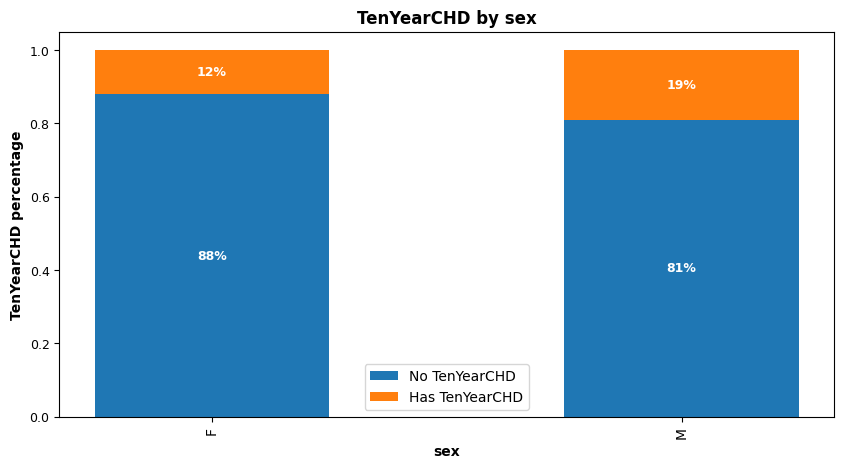

In [26]:
create_stacked_bar("sex")

##### 1. Why did you pick the specific chart?

A stacked bar chart is a bar chart in which each bar is divided into segments stacked on top of each other, each segment corresponding to a different category within the data

##### 2. What is/are the insight(s) found from the chart?

Above stacked bar shows that only 12 %  of female is having ten year CHD and 19% of male is having ten year CHD

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [27]:
# Chart - 2 visualization code
df['is_smoking'].value_counts()

,count
is_smoking,
NO,1703
YES,1687


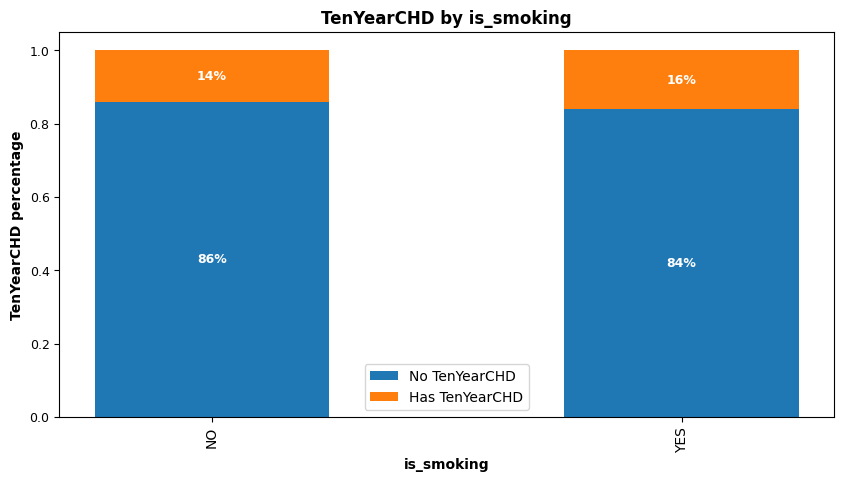

In [28]:
#create_stacked_bar("BPMeds")
create_stacked_bar("is_smoking")

##### 1. Why did you pick the specific chart?

Like previous stack bar, for finding possibity of patients having 10 year CHD with or without smoking habit I use stacked bars.

##### 2. What is/are the insight(s) found from the chart?

The above chart gives us two stacked bars , 'NO' means that patients who doesn't smoke and 'YES'means  that patients who smokes.


*   'No' stackred bar shows that 86% patient who doesn't smoke dont have risk of 10 year CHD but 14% patient having possibility of 10 year CHD even without smoking

*   'YES' stackred bar shows that 84% patient who smoke but dont have risk of 10 year CHD but 16% patient having possibility of 10 year CHD even with smoking




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   It's weird that patients who didn't smoke suffered from CHD
*   Even some patients having 10 year CHD without smoking but from above data we can see that patients having smoking habits have 2 percent more chances of having risk of 10 year CHD



#### Chart - 3

In [29]:
# Chart - 3 visualization code

df['prevalentStroke'].value_counts()

,count
prevalentStroke,
0,3368
1,22


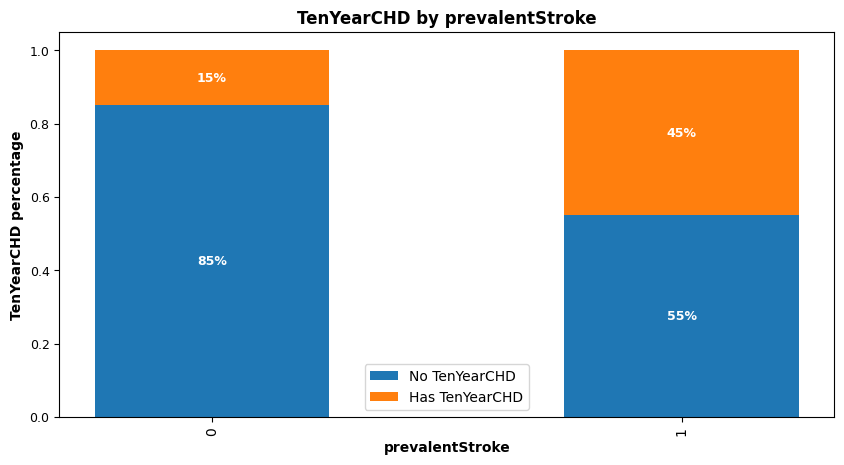

In [30]:
create_stacked_bar("prevalentStroke")

##### 1. Why did you pick the specific chart?

 for finding possibity of patients having 10 year CHD who is having history of  prevalentstroke

##### 2. What is/are the insight(s) found from the chart?

The above chart gives us two stacked bars , '0' means that patients who doesn't have history of Prevalent Stroke and 'YES'means that patients who have history of Prevalent Stroke.



*   '0' stacked bar shows that, 15% patient having possibility of 10 year CHD even without having history of prevalent stroke.

*   '1' stacked bar shows that, 45% patient having possibility of 10 year CHD who is having history of prevalent stroke.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [31]:
# Chart - 4 visualization code
df['prevalentHyp'].value_counts()

,count
prevalentHyp,
0,2321
1,1069


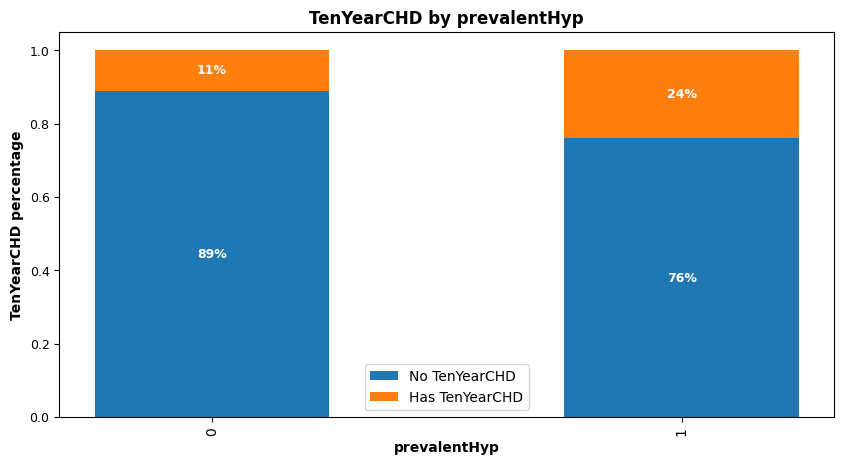

In [32]:
create_stacked_bar("prevalentHyp")

##### 1. Why did you pick the specific chart?

for finding possibity of patients having risk of 10 year CHD who is having history of prevalentHyp

##### 2. What is/are the insight(s) found from the chart?

The above chart gives us two stacked bars , '0' means that patients who doesn't have history of PrevalentHyp and 'YES'means that patients who have history of PrevalentHyp.



*   '0' stacked bar shows that, 11% patient having possibility of 10 year CHD even without having history of prevalentHyp.

*   '1' stacked bar shows that, 24% patient having possibility of 10 year CHD who is having history of prevalentHyp.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [33]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Chol_Range
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,Borderline
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Borderline
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,High
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Borderline
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,High


In [34]:
# Chart - 5 visualization code
df['diabetes'].value_counts()

,count
diabetes,
0,3303
1,87


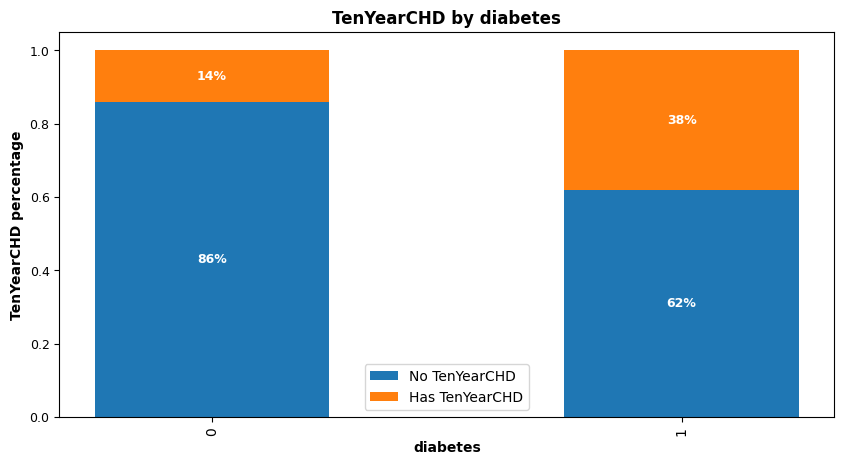

In [35]:
create_stacked_bar("diabetes")

##### 1. Why did you pick the specific chart?

for finding possibity of patients having risk of 10 year CHD who is diabetes

##### 2. What is/are the insight(s) found from the chart?

The above chart gives us two stacked bars , '0' means that patients who don't have diabetes  and '1'means that patients who have diabetes.


*   '0' stacked bar shows that, 14% patient having possibility of risk of 10 year CHD even without having history of diabetes.

*   '1' stacked bar shows that, 38% patient having possibility of risk of 10 year CHD who is having history of diabetes.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [36]:
# Chart - 6 visualization code
df['Chol_Range'].value_counts()

,count
Chol_Range,
High,1625
Borderline,1102
Normal,663


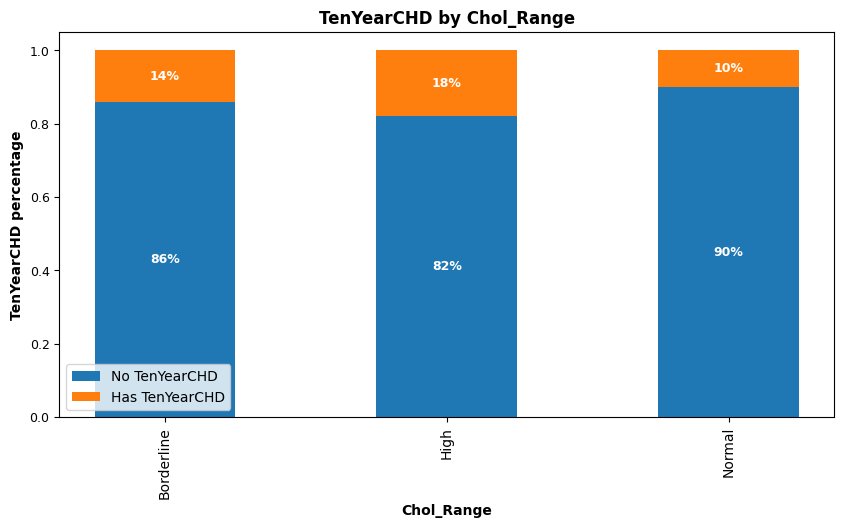

In [37]:
create_stacked_bar("Chol_Range")

##### 1. Why did you pick the specific chart?

for finding possibity of patients having risk of 10 year CHD on the basis of Cholesterol range

##### 2. What is/are the insight(s) found from the chart?

The above chart gives us three stacked bars:

*   'Borderline' stacked bar shows that, 14% patient having possibility of risk of 10 year CHD who is having cholesterol at Borderline range

*   'High' stacked bar shows that, 18% patient having possibility of risk of 10 year CHD who is having cholesterol at High range

*   'Low' stacked bar shows that, 10% patient having possibility of risk of 10 year CHD who is having cholesterol at Low range.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [38]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [39]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [40]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [41]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [42]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [43]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [44]:
# Correlation Heatmap visualization code
int_columns_df = df.select_dtypes(include = ['int','float'])
int_columns_df.head()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


<Axes: >

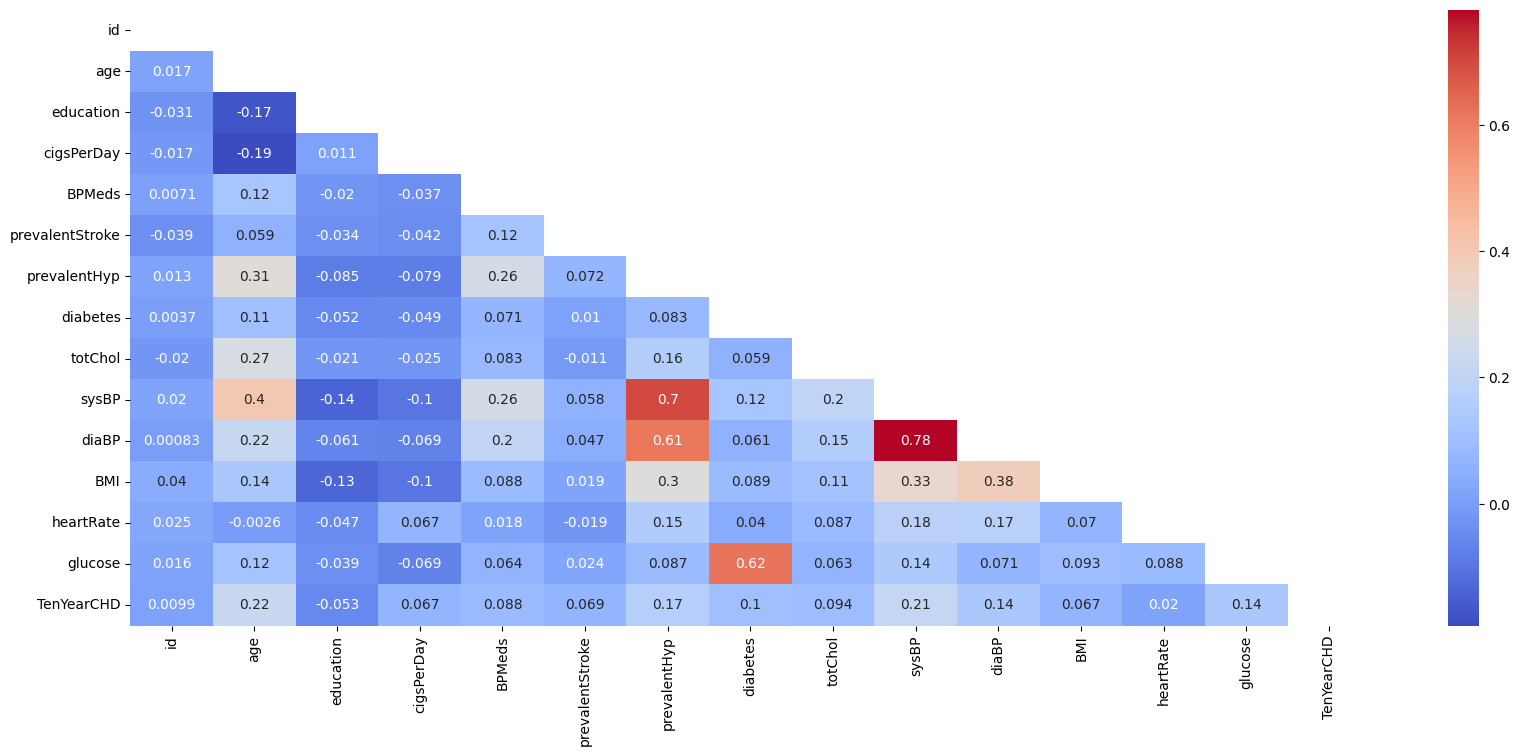

In [45]:
plt.figure(figsize=(20,8))
correlation = int_columns_df.corr()
mask = np.triu(np.ones_like(int_columns_df.corr()))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

In this we can clearly see that SysBP,prevelentHyp,diabetes are highly correlated

#### Chart - 15 - Pair Plot

In [46]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Chol_Range
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,Borderline
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Borderline
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,High
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Borderline
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,High


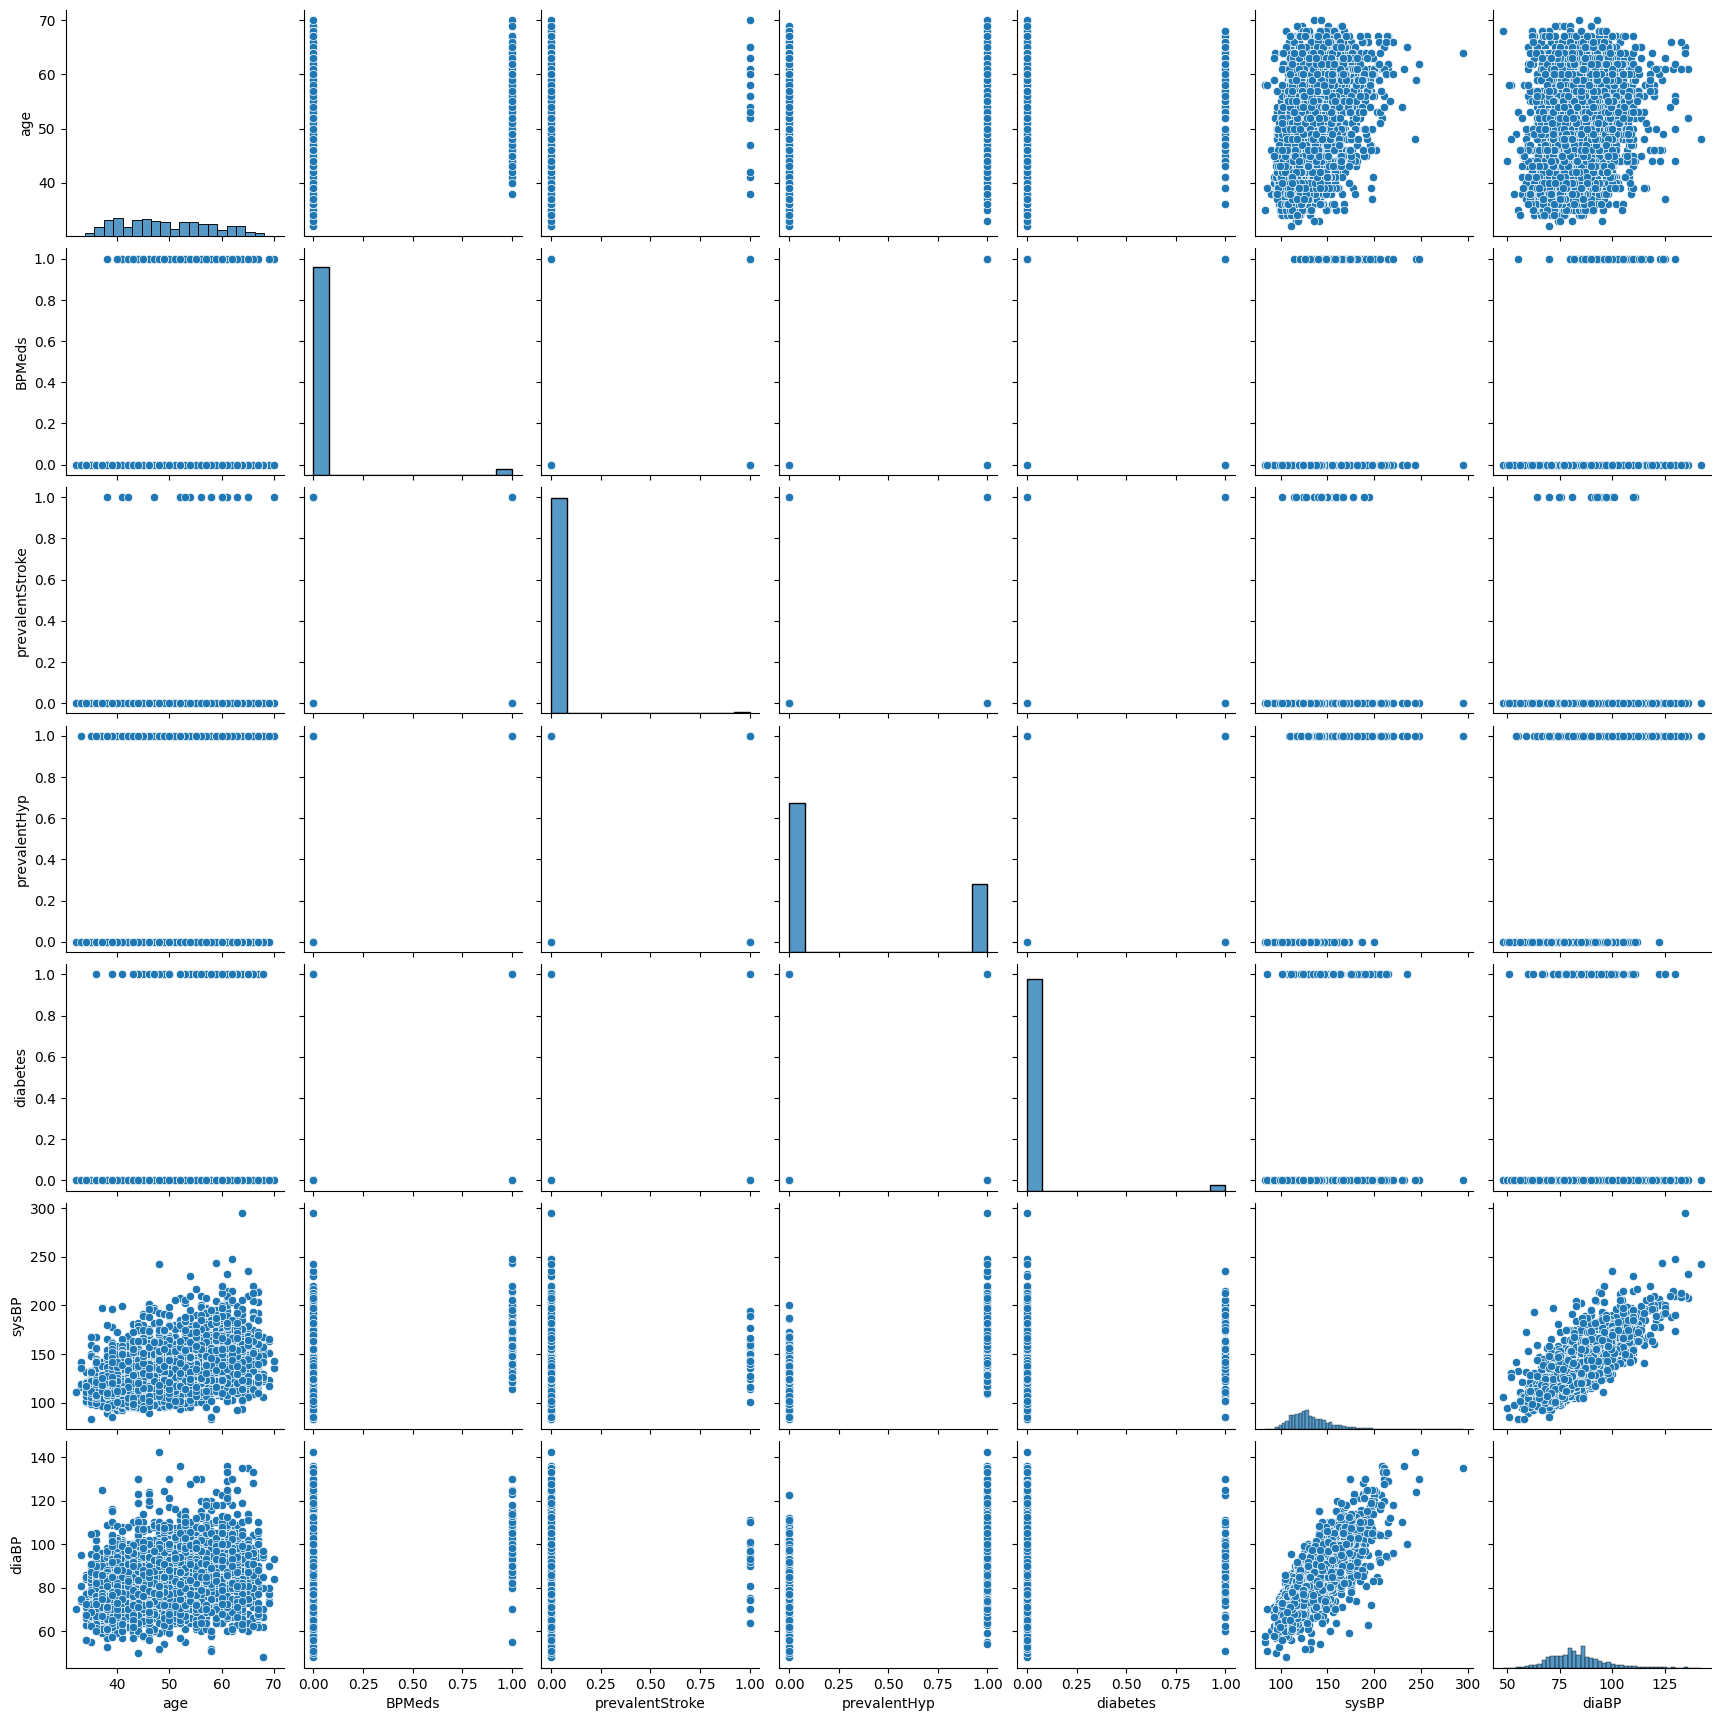

In [47]:
# Pair Plot visualization code
sns.pairplot(df[['age','BPMeds','prevalentStroke','prevalentHyp','diabetes','sysBP','diaBP']])

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Handling Missing Values & Missing Value Imputation
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Our dataset contains outliers, so we are using median technique for filling the missing values.

### 2. Handling Outliers

In [49]:
# Handling Outliers & Outlier treatments




##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [50]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Chol_Range
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,Borderline
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,Borderline
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,High
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,Borderline
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,High


### **1- One Hot Encoding**

In [51]:
df["sex"]=df["sex"].map({'M':1,'F':2})

df['sex'] = df['sex'].astype(int)

In [52]:
df["is_smoking"]=df["is_smoking"].map({'YES':1,'NO':0})

df['is_smoking'] = df['is_smoking'].astype(int)

In [53]:
df['is_smoking'].value_counts()

,count
is_smoking,
0,1703
1,1687


In [54]:
df["Chol_Range"]=df["Chol_Range"].map({'Normal':1,'Borderline':2,'High':3})

df['Chol_Range'] = df['Chol_Range'].astype(int)

In [55]:
df['Chol_Range'].value_counts()

,count
Chol_Range,
3,1625
2,1102
1,663


In [56]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Data Encoding is the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process. The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.


*   Here we are using One Hot encoding technique.One-Hot Encoding is the Most Common method for encoding Categorical variables.




### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [57]:
# Expand Contraction

#### 2. Lower Casing

In [58]:
# Lower Casing

#### 3. Removing Punctuations

In [59]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [60]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [61]:
# Remove Stopwords

In [62]:
# Remove White spaces

#### 6. Rephrase Text

In [63]:
# Rephrase Text

#### 7. Tokenization

In [64]:
# Tokenization

#### 8. Text Normalization

In [65]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [66]:
# POS Taging

#### 10. Text Vectorization

In [67]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [68]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [69]:

X = df.drop(columns=['TenYearCHD','education'])
y = df['TenYearCHD']

# Save all feature names as list
feature_cols = X.columns.tolist()

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=[ 'is_smoking', 'diabetes', 'sysBP','diaBP','totChol','Chol_Range'])
num_cols = X_num.columns.tolist()

TenYearCHD
0    0.849263
1    0.150737
Name: proportion, dtype: float64


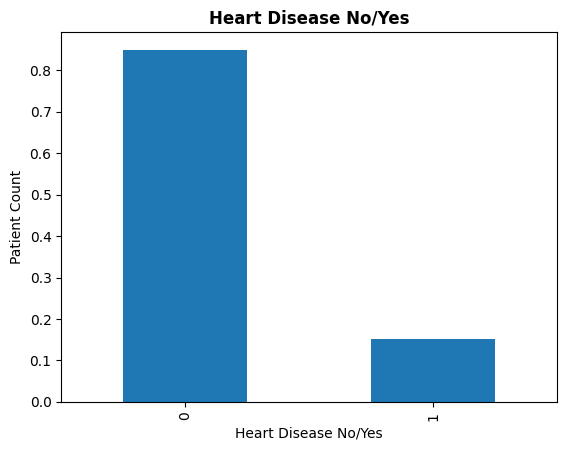

In [70]:

cla_report = df['TenYearCHD'].value_counts(normalize=True)
print(cla_report)


cla_report.plot(kind = 'bar')
plt.title('Heart Disease No/Yes',fontweight = "bold")
plt.xlabel('Heart Disease No/Yes')
plt.ylabel('Patient Count')
plt.show()

##### What all feature selection methods have you used  and why?

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [71]:
# Transform Your data

### 6. Data Scaling

In [72]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [73]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [74]:
# Define function to split data with and without SMOTE

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [75]:
# Shape of the train and test data
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(2373, 16)
Shape of y_train:(2373,)
Shape of X_test:(1017, 16)
Shape of y_test:(1017,)


In [76]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())

Dataset Before: TenYearCHD
0    2017
1     356
Name: count, dtype: int64

Dataset After: TenYearCHD
0    2017
1    2017
Name: count, dtype: int64


##### What data splitting ratio have you used and why?

We use train_test_split() to split the data: test_size=0.3 means 30% of the data is used for testing, and 70% for training.

## ***7. ML Model Implementation***

### ML Model - 1

### **1. Logistic Regression**

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [79]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.1)

In [80]:
# Best parameters
logistic_grid_model.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [81]:
# Best score
logistic_grid_model.best_score_

np.float64(0.6670884864807748)

In [82]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train_smt)
y_test_pred = logistic_grid_model.predict(X_test)

In [83]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [84]:
# Training and testing accuracy
train_accuracy = accuracy_score(y_train_pred, y_train_smt)
test_accuracy = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.6861675756073377
Testing accuracy: 0.6066863323500492


In [85]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
log_test_precision = precision_score(y_test,y_test_pred)

  # recall,
log_test_recall = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision)
print(' ')
print('Recall score of logistic model:', log_test_recall)
print(' ')
print('F1 score of logistic model: ', log_f1_score)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']


Precision score of logistic model: 0.18829516539440203
 
Recall score of logistic model: 0.4774193548387097
 
F1 score of logistic model:  0.27007299270072993
 
ROC AUC score of logistic model:  0.5536748746351321
 
Confusion matrix of logistic model 
: [[543 319]
 [ 81  74]]
 


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

For ML model implementaion first I use Linear regression model.In machine learning, linear regression uses a linear equation to model the relationship between a dependent variable (X) and one or more independent variables (Y).

In [86]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

### **RANDOM FOREST**

In [88]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [89]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train_smt)
y_test_rf_pred = rf_classifier.predict(X_test)

In [90]:
# Training and testing accuracy
rf_training_accuracy = accuracy_score(y_train_smt,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)

Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest: 0.7925270403146509


Precision score of RANDOM FOREST model: 0.291044776119403
 
Recall score of RANDOM FOREST model: 0.25161290322580643
 
F1 score of RANDOM FOREST model:  0.2698961937716263
 
ROC AUC score of RANDOM FOREST model:  0.570702043260235
 
Confusion matrix of RANDOM FOREST 
: [[767  95]
 [116  39]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

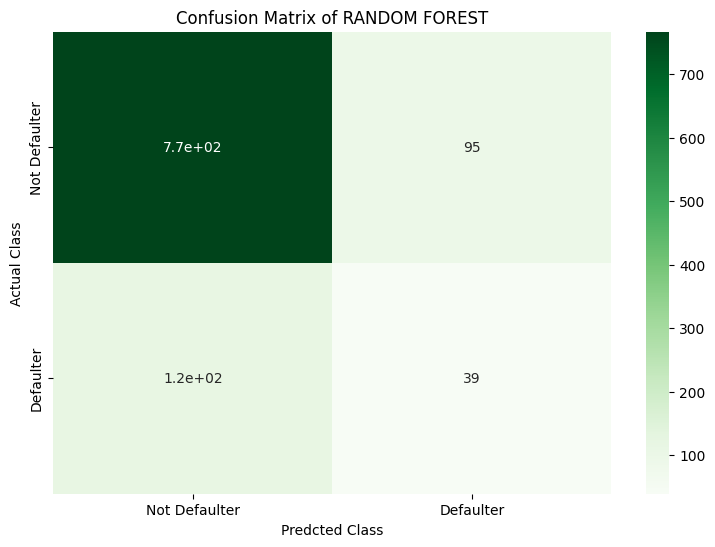

In [91]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
rf_test_precision = precision_score(y_test,y_test_rf_pred)

  # recall,
rf_test_recall = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here we are using Random Forest regression, which is a powerful machine learning technique used for predicting numerical values. It leverages the collective intelligence of multiple decision trees to improve accuracy and reduce overfitting.

In [92]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

**Random Forest Using hyperparameter tuning**

In [93]:
params_grid = {'n_estimators' : [100,150],'max_depth' : [10,20]}

In [94]:
grid_renf_clf = GridSearchCV(RandomForestClassifier(), params_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_renf_clf.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 150]},
             scoring='accuracy', verbose=3)

In [95]:
# print best score and best params
print(grid_renf_clf.best_score_)
print(grid_renf_clf.best_params_)

0.8611896648374344
{'max_depth': 20, 'n_estimators': 100}


In [96]:
# Get the predicted classes
y_train_grid_rf_pred = grid_renf_clf.predict(X_train_smt)
y_test_grid_rf_pred = grid_renf_clf.predict(X_test)

In [97]:
# Get the accuracy scores
ref_training_accuracy = accuracy_score(y_train_grid_rf_pred,y_train_smt)
ref_testing_accuracy = accuracy_score(y_test_grid_rf_pred,y_test)

print("The accuracy on train data is ", ref_training_accuracy)
print("The accuracy on test data is ", ref_testing_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.7856440511307768


Precision score of RANDOM FOREST: 0.2631578947368421
 
Recall score of RANDOM FOREST: 0.22580645161290322
 
F1 score of RANDOM FOREST:  0.24305555555555555
 
ROC AUC score of RANDOM FOREST:  0.5560586782426465
 
Confusion matrix of RANDOM FOREST model 
: [[764  98]
 [120  35]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

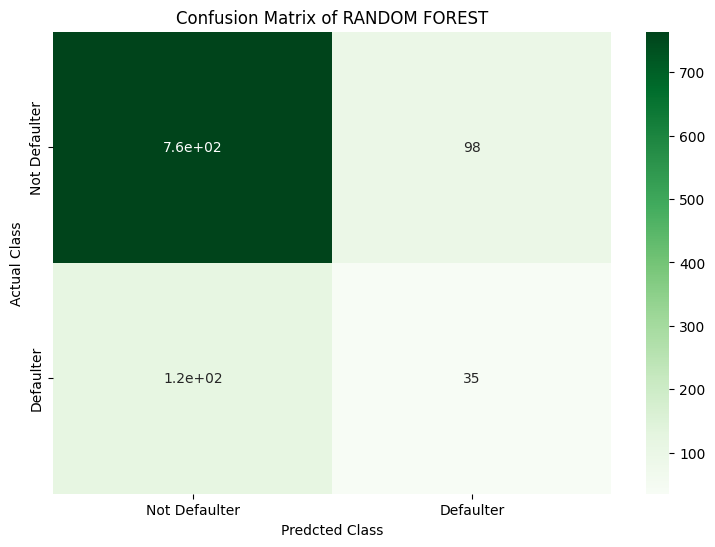

In [98]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
ref_test_precision = precision_score(y_test,y_test_grid_rf_pred)

  # recall,
ref_test_recall = recall_score(y_test,y_test_grid_rf_pred,)

  # f1 score
ref_f1_score = f1_score(y_test,y_test_grid_rf_pred)

  # roc_auc_score
ref_roc_auc_score = roc_auc_score(y_test,y_test_grid_rf_pred)

  # confusion matrix
ref_confusion_mat = confusion_matrix(y_test,y_test_grid_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST:',ref_test_precision)
print(' ')
print('Recall score of RANDOM FOREST:', ref_test_recall)
print(' ')
print('F1 score of RANDOM FOREST: ', ref_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST: ',ref_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST model \n:',ref_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(ref_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

##### Which hyperparameter optimization technique have you used and why?

Here we are using Random forest hyperparameter tuning techniques using GrideSearch CV

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

### **XGBoost**

In [99]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [100]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train_smt,y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [101]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train_smt)
y_test_xgb_pred = xgb.predict(X_test)


# gettig training and testing accuracy
xgb_training_accuracy = accuracy_score(y_train_xgb_pred,y_train_smt)
xgb_testing_accuracy = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy}')

Training Accuracy of XGBClassifier: 0.9992563212692117
Testing Accuracy of XGBClassifier: 0.7925270403146509


Precision score of XGBoost model: 0.23076923076923078
 
Recall score of XGBoost model: 0.15483870967741936
 
F1 score of XGBoost model:  0.18532818532818532
 
ROC AUC score of XGBoost model:  0.5310156425417258
 
Confusion matrix of XGBoost model 
: [[782  80]
 [131  24]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

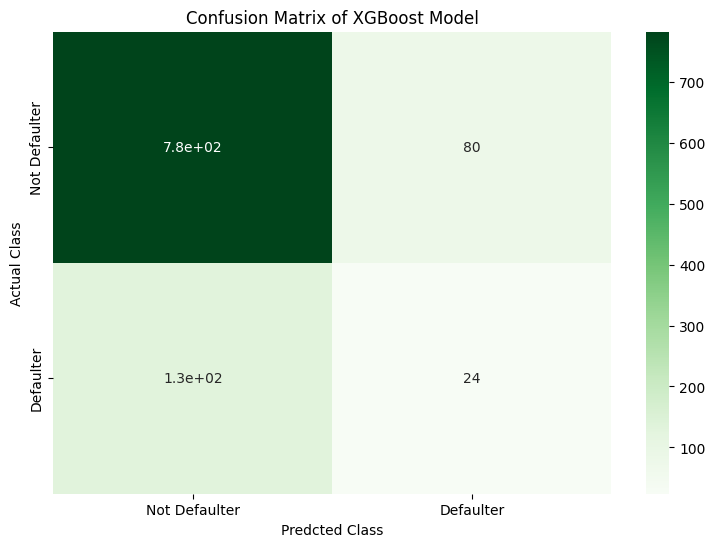

In [102]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
xg_test_precision = precision_score(y_test,y_test_xgb_pred)

  # recall,
xg_test_recall = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost is a distributed, open-source machine learning library that uses gradient boosted decision trees, a supervised learning boosting algorithm that makes use of gradient descent. It is known for its speed, efficiency and ability to scale well with large datasets.

In [103]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **Decision Tree Classifier**

**Decision Tree Classifier with hyperparameter tuning**

In [105]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train_smt,y_train_smt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [106]:
decision_tree_model.best_estimator_
decision_tree_model.best_params_
decision_tree_model.best_score_

np.float64(0.7837898594306468)

In [107]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train_smt)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train_smt,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)

Training accuracy of decision tree classifier: 0.8703520079325732
Testing accuracy of decision tree classifier: 0.7020648967551623


Precision score of Decision Tree model: 0.1864406779661017
 
Recall score of Decision Tree model: 0.2838709677419355
 
F1 score of Decision Tree model:  0.22506393861892582
 
ROC AUC score of Decision Tree model:  0.5305665743582068
 
Confusion matrix of Decision Tree model 
: [[670 192]
 [111  44]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

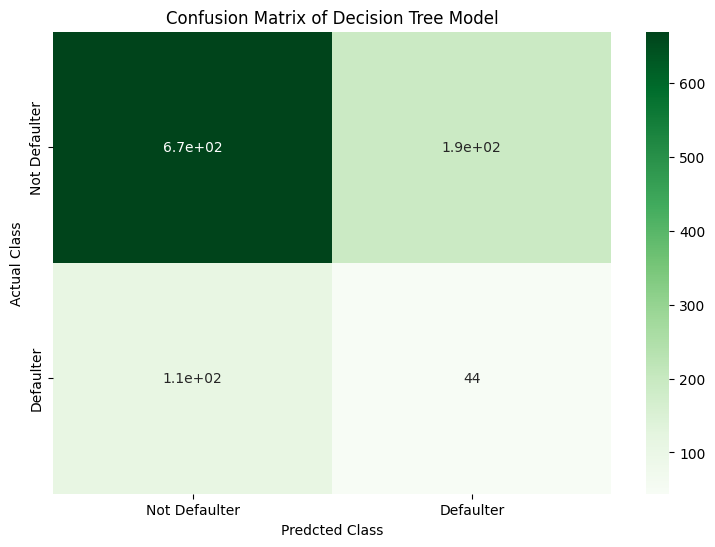

In [108]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
dt_test_precision = precision_score(y_test,y_test_dtc_pred)

  # recall,
dt_test_recall = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

## **EVALUATION MATRIX**

In [109]:
# explaining evaluation matrix
Models = ['Logistic Regression','Random Forest','Random Forest tuning','Decision Tree Classifier', 'XGBoost Classifier']
train_accuracy = [train_accuracy, rf_training_accuracy, ref_training_accuracy,dtc_training_accuracy, xgb_training_accuracy]
test_accuracy = [test_accuracy, rf_testing_accuracy, ref_testing_accuracy,dtc_testing_accuracy, xgb_testing_accuracy]
precision_score = [log_test_precision, rf_test_precision, ref_test_precision,dt_test_precision, xg_test_precision]
recall_score = [log_test_recall, rf_test_recall, ref_test_recall,dt_test_recall,xg_test_recall]
f1_score = [log_f1_score, rf_f1_score, ref_f1_score,dt_f1_score, xg_f1_score]
roc_auc_score = [log_roc_auc_score, rf_roc_auc_score, ref_roc_auc_score,dt_roc_auc_score, xg_roc_auc_score]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

evaluation_matrix = pd.DataFrame(data)
evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,0.686168,0.606686,0.188295,0.477419,0.270073,0.553675
1,Random Forest,1.000000,0.792527,0.291045,0.251613,0.269896,0.570702
2,Random Forest tuning,1.000000,0.785644,0.263158,0.225806,0.243056,0.556059
3,Decision Tree Classifier,0.870352,0.702065,0.186441,0.283871,0.225064,0.530567
4,XGBoost Classifier,0.999256,0.792527,0.230769,0.154839,0.185328,0.531016


# **Try to create model using another way(Model - 2)**

### **Create some featers**

In [110]:
# Import the data
df = pd.read_csv('/content/drive/MyDrive/DataSet/Copy of data_cardiovascular_risk.csv')

In [111]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [113]:
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['education'].fillna(df['education'].median(), inplace=True)

In [114]:
df.isnull().sum()

,0
id,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [115]:
# Creating variable with the help of index 0
df = pd.get_dummies(df,drop_first=True,sparse=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               3390 non-null   int64              
 1   age              3390 non-null   int64              
 2   education        3390 non-null   float64            
 3   cigsPerDay       3390 non-null   float64            
 4   BPMeds           3390 non-null   float64            
 5   prevalentStroke  3390 non-null   int64              
 6   prevalentHyp     3390 non-null   int64              
 7   diabetes         3390 non-null   int64              
 8   totChol          3390 non-null   float64            
 9   sysBP            3390 non-null   float64            
 10  diaBP            3390 non-null   float64            
 11  BMI              3390 non-null   float64            
 12  heartRate        3390 non-null   float64            
 13  glucose          3

In [116]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['TenYearCHD'])

# Print the actual data and resampled data
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [117]:
# create the list of all column name
columns = list(df.columns)

In [118]:
columns.pop()

'is_smoking_YES'

In [119]:
columns.pop()

'sex_M'

In [120]:
data = pd.DataFrame(x_smote, columns=columns)

In [121]:
data['TenYearCHD'] = y_smote

### **Feature Engineering**

In [122]:
df.head()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,0,64,2.0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,False,True
1,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,True,False
2,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,False,True
3,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,True,True
4,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,False,True


In [123]:
# LABEL ENCODING FOR SEX
encoders_nums = {"sex":{"F": 0, "M": 1}}
data = data.replace(encoders_nums)

In [124]:
# Drop id column from the dataset
data.drop('id',axis = 1, inplace = True)

In [125]:
# Create a variabel
data_log = data.copy()

In [126]:
X = data_log.drop(['TenYearCHD'],axis=1)
y = data_log['TenYearCHD']

In [127]:
columns = X.columns

### **Use train test split**

In [128]:
# Use standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [129]:
# use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

### **1. Logistic Regression**

In [130]:
from sklearn.model_selection import cross_val_score

In [131]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [132]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.1)

In [133]:
# Best parameters
logistic_grid_model.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [134]:
# Best score
logistic_grid_model.best_score_

np.float64(0.6796903732144696)

In [135]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train)
y_test_pred = logistic_grid_model.predict(X_test)

**Model Evaluation**

In [136]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [137]:
# Training and testing accuracy
train_accuracy1 = accuracy_score(y_train_pred, y_train)
test_accuracy1 = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy1)
print('Testing accuracy:', test_accuracy1)

Training accuracy: 0.6823956442831216
Testing accuracy: 0.6917411888479748


Precision score of logistic model: 0.6923890063424947
 
Recall score of logistic model: 0.6894736842105263
 
F1 score of logistic model:  0.6909282700421941
 
ROC AUC score of logistic model:  0.6917399966793957
 
Confusion matrix of logistic model 
: [[660 291]
 [295 655]]
 


Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

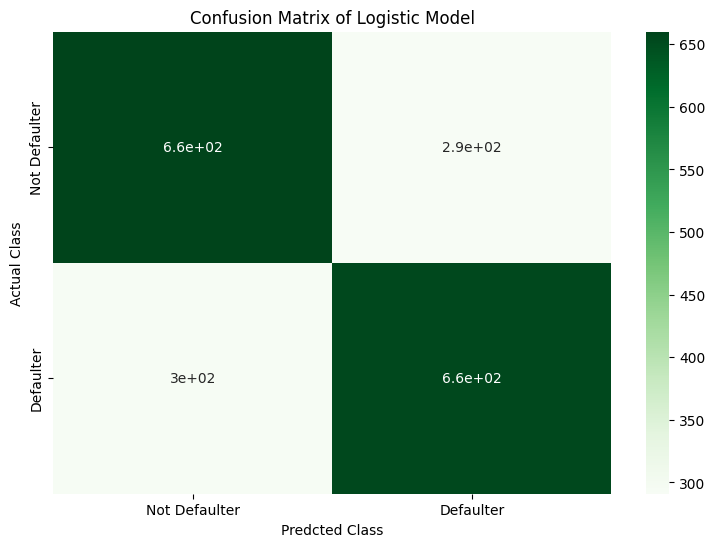

In [138]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
log_test_precision1 = precision_score(y_test,y_test_pred)

  # recall,
log_test_recall1 = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score1 = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score1 = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision1)
print(' ')
print('Recall score of logistic model:', log_test_recall1)
print(' ')
print('F1 score of logistic model: ', log_f1_score1)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score1)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

### **2.RANDOM FOREST**

In [139]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [140]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train)
y_test_rf_pred = rf_classifier.predict(X_test)

In [141]:
# Training and testing accuracy
rf_training_accuracy1 = accuracy_score(y_train,y_train_rf_pred)
rf_testing_accuracy1 = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy1)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy1)

Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest: 0.875854813256181


Precision score of RANDOM FOREST model: 0.8863636363636364
 
Recall score of RANDOM FOREST model: 0.8621052631578947
 
F1 score of RANDOM FOREST model:  0.8740661686232657
 
ROC AUC score of RANDOM FOREST model:  0.8758475842603354
 
Confusion matrix of RANDOM FOREST 
: [[846 105]
 [131 819]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

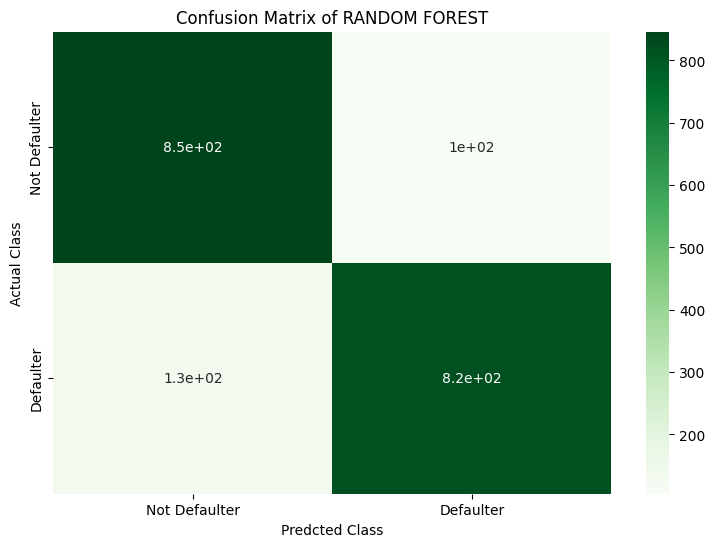

In [142]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
rf_test_precision1 = precision_score(y_test,y_test_rf_pred)

  # recall,
rf_test_recall1 = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score1 = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score1 = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision1)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall1)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score1)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score1)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

### **3.Decision Tree Classifier**

**Decision Tree Classifier with hyperparameter tuning**

In [143]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [144]:
decision_tree_model.best_estimator_
decision_tree_model.best_params_
decision_tree_model.best_score_

np.float64(0.7547952306894764)

In [145]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy1 = accuracy_score(y_train,y_train_dtc_pred)
dtc_testing_accuracy1 = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy1)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy1)

Training accuracy of decision tree classifier: 0.8330308529945554
Testing accuracy of decision tree classifier: 0.7990531299316149


Precision score of Decision Tree model: 0.8349056603773585
 
Recall score of Decision Tree model: 0.7452631578947368
 
F1 score of Decision Tree model:  0.7875417130144605
 
ROC AUC score of Decision Tree model:  0.7990248491892191
 
Confusion matrix of Decision Tree model 
: [[811 140]
 [242 708]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

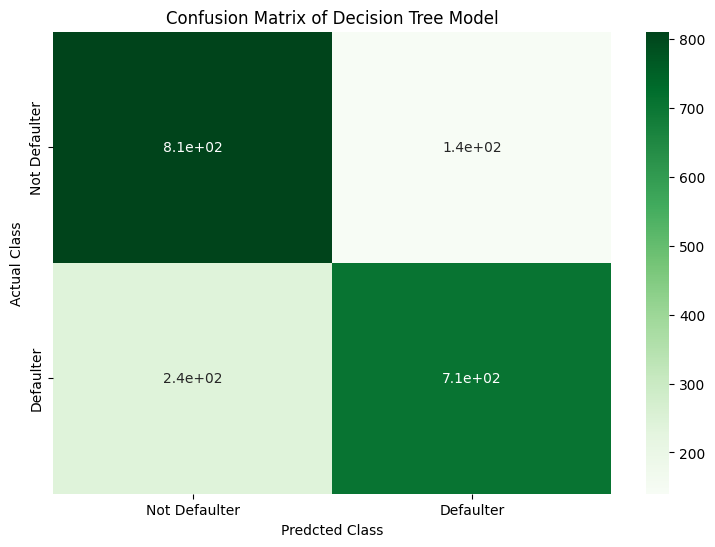

In [146]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
dt_test_precision1 = precision_score(y_test,y_test_dtc_pred)

  # recall,
dt_test_recall1 = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score1 = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score1 = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision1)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall1)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score1)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score1)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

### **4.XGBoost**

In [147]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [148]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred = xgb.predict(X_test)


# gettig training and testing accuracy
xgb_training_accuracy1 = accuracy_score(y_train_xgb_pred,y_train)
xgb_testing_accuracy1 = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy1}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy1}')

Training Accuracy of XGBClassifier: 0.9989629245527613
Testing Accuracy of XGBClassifier: 0.8842714360862703


Precision score of XGBoost model: 0.9028697571743929
 
Recall score of XGBoost model: 0.8610526315789474
 
F1 score of XGBoost model:  0.8814655172413793
 
ROC AUC score of XGBoost model:  0.8842592285129227
 
Confusion matrix of XGBoost model 
: [[863  88]
 [132 818]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

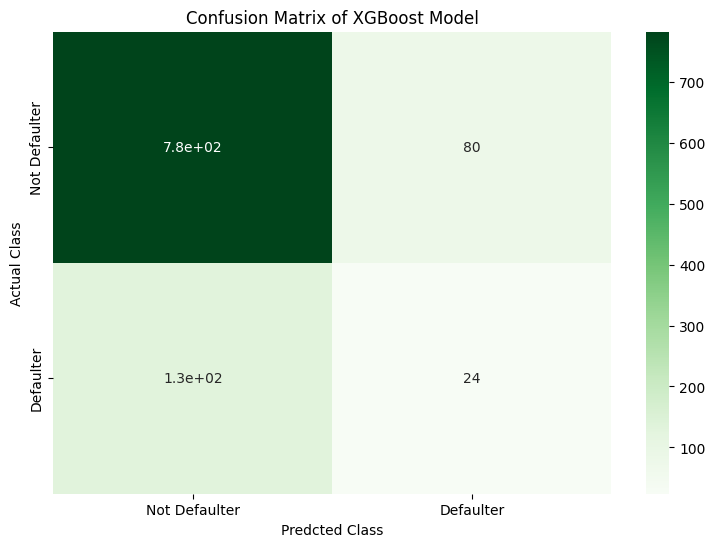

In [149]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
xg_test_precision1 = precision_score(y_test,y_test_xgb_pred)

  # recall,
xg_test_recall1 = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score1 = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score1 = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat1 = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision1)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall1)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score1)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score1)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat1)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

### **EVALUATION MATRIX**

In [150]:
# explaining evaluation matrix
Models = ['Logistic Regression','Random Forest','Decision Tree Classifier', 'XGBoost Classifier']
train_accuracy = [train_accuracy1, rf_training_accuracy1,dtc_training_accuracy1, xgb_training_accuracy1]
test_accuracy = [test_accuracy1, rf_testing_accuracy1,dtc_testing_accuracy1, xgb_testing_accuracy1]
precision_score = [log_test_precision1, rf_test_precision1,dt_test_precision1, xg_test_precision1]
recall_score = [log_test_recall1, rf_test_recall1,dt_test_recall1,xg_test_recall1]
f1_score = [log_f1_score1, rf_f1_score,dt_f1_score1, xg_f1_score1]
roc_auc_score = [log_roc_auc_score1, rf_roc_auc_score1,dt_roc_auc_score1, xg_roc_auc_score1]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

evaluation_matrix = pd.DataFrame(data)
evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,0.682396,0.691741,0.692389,0.689474,0.690928,0.691740
1,Random Forest,1.000000,0.875855,0.886364,0.862105,0.269896,0.875848
2,Decision Tree Classifier,0.833031,0.799053,0.834906,0.745263,0.787542,0.799025
3,XGBoost Classifier,0.998963,0.884271,0.902870,0.861053,0.881466,0.884259


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**


### **Prepare for Modeling**

* we use **pairplots** for understanding the data.

* This dataset is also **imbalanced**, with **85%** non-default vs **15%** default.

* We use **SMOTE** because the class is highly **Imbalance**

### **MODELS - 1**

* Using a **Logistic Regression** classifier, we can predict with **63%** accuracy, whether a patient is having risk of 10 year CHD.

* Using **Decision Tree** classifier, we can predict with **68%** accuracy whether a patient is having risk of 10 year CHD.

* Using **Random Fores**t, we can predict with **79%** accuracy whether a patient is having risk of 10 year CHD.

* By applying **XGBoost Classifier** with recall **18%**, we can predict with **80%** accuracy whether a patient is having risk of 10 year CHD.

---
### **MODELS - 2**


* Using a **Logistic Regression** classifier, we can predict with **68%** accuracy, whether a patient is having risk of 10 year CHD.

* Using **Decision Tree** classifier, we can predict with **73%** accuracy whether a patient is having risk of 10 year CHD.

* Using **Random Fores**t, we can predict with **87%** accuracy whether a patient is having risk of 10 year CHD.

* By applying **XGBoost Classifier** with recall **87%**, we can predict with **88%** accuracy whether a patient is having risk of 10 year CHD.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***